In [174]:
import numpy as np
import matplotlib.pyplot as plt

# DH Parameters
d1, a1, alpha1 = 0.1, 0, np.pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, np.pi / 2
d5, a5, alpha5 = 0.1, 0, 0

# Target end-effector position
P_x = 0.5
P_y = 0
P_z = 0.5

In [175]:
def calculate_omega(P_x, P_y, P_z, d1, d5):
    # Calculate the distance from the base to the wrist center (P_x, P_y, P_z - d5)
    d = np.sqrt(P_x**2 + P_y**2 + (P_z - d1)**2)
    
    # Calculate omega using the geometric relationship
    omega = np.degrees(np.arccos((d - d5) / d))
    
    return omega

print(calculate_omega(P_x, P_y, P_z, d1, d5))


24.619977328657107


In [169]:

def calculate_inverse_kinematics(P_x, P_y, P_z, a2, a3, d1, d5):
    # Calculate omega
    omega = calculate_omega(P_x, P_y, P_z, d1, d5)
    
    # Calculate wrist orientation angle theta234
    theta234 = 90 - omega

    # Calculate R
    R = d5 * np.cos(np.radians(omega))

    # Calculate wrist position coordinates
    X_w = P_x - R * np.cos(np.radians(theta234))
    Y_w = P_y - R * np.sin(np.radians(theta234))
    Z_w = P_z - d5 * np.sin(np.radians(omega))

    # Calculate R_w
    R_w = np.sqrt(X_w**2 + Y_w**2)

    # Calculate S
    S = np.sqrt((Z_w - d1)**2 + R_w**2)

    # Calculate theta_1
    theta_1 = np.degrees(np.arctan2(P_y, P_x))

    # Calculate beta and alpha
    beta = np.degrees(np.arccos(np.clip((S**2 + a2**2 - a3**2) / (2 * a2 * S), -1.0, 1.0)))
    alpha = np.degrees(np.arctan2(Z_w - d1, R_w))

    # Calculate theta_2
    theta_2 = alpha + beta

    # Calculate theta_3
    theta_3 = np.degrees(np.arccos(np.clip((S**2 - a2**2 - a3**2) / (2 * a2 * a3), -1.0, 1.0)))

    # Calculate theta_4
    theta_4 = theta234 - theta_2 - theta_3

    return theta_1, theta_2, theta_3, theta_4, omega

In [170]:
theta_1, theta_2, theta_3, theta_4, omega = calculate_inverse_kinematics(P_x, P_y, P_z, a2, a3, d1, d5)

print(f"Theta 1: {theta_1} degrees")
print(f"Theta 2: {theta_2} degrees")
print(f"Theta 3: {theta_3} degrees")
print(f"Theta 4: {theta_4} degrees")
print(f"Omega: {omega} degrees")

Theta 1: 0.0 degrees
Theta 2: 99.82300411924865 degrees
Theta 3: 31.745800782511207 degrees
Theta 4: -67.34542687605241 degrees
Omega: 25.776621974292556 degrees


In [171]:
# Define joint angles in degrees
theta_degrees = [theta_1, theta_2, theta_3, theta_4, 0]  # theta5 is 0 as an example
print(theta_degrees)

[0.0, 99.82300411924865, 31.745800782511207, -67.34542687605241, 0]


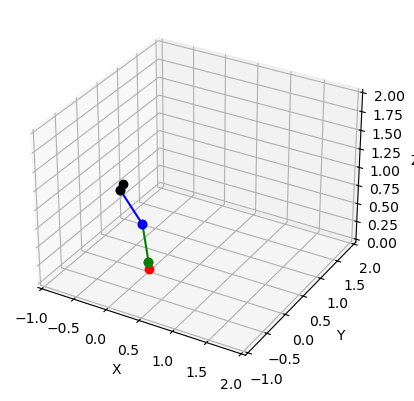

(-0.3735756761064708, 0.0, 1.0567990977911423)

In [172]:


def plot_robot(theta_1, theta_2, theta_3, theta_4, a2, a3, d1, d5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Calculate the positions of each joint
    # Base
    x0, y0, z0 = 0, 0, 0

    # Joint 1
    x1 = x0
    y1 = y0
    z1 = d1

    # Joint 2
    x2 = x1 + a2 * np.cos(np.radians(theta_1)) * np.cos(np.radians(theta_2))
    y2 = y1 + a2 * np.sin(np.radians(theta_1)) * np.cos(np.radians(theta_2))
    z2 = z1 + a2 * np.sin(np.radians(theta_2))

    # Joint 3
    x3 = x2 + a3 * np.cos(np.radians(theta_1)) * np.cos(np.radians(theta_2 + theta_3))
    y3 = y2 + a3 * np.sin(np.radians(theta_1)) * np.cos(np.radians(theta_2 + theta_3))
    z3 = z2 + a3 * np.sin(np.radians(theta_2 + theta_3))

    # End-effector (wrist)
    x4 = x3 + d5 * np.cos(np.radians(theta_1)) * np.cos(np.radians(theta_2 + theta_3 + theta_4))
    y4 = y3 + d5 * np.sin(np.radians(theta_1)) * np.cos(np.radians(theta_2 + theta_3 + theta_4))
    z4 = z3 + d5 * np.sin(np.radians(theta_2 + theta_3 + theta_4))

    # Plot the robot
    ax.plot([x0, x1], [y0, y1], [z0, z1], 'ro-')
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'go-')
    ax.plot([x2, x3], [y2, y3], [z2, z3], 'bo-')
    ax.plot([x3, x4], [y3, y4], [z3, z4], 'ko-')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim([-1, 2])
    ax.set_ylim([-1, 2])
    ax.set_zlim([0, 2])
    
    plt.show()

    return x4, y4, z4
  
    

plot_robot(theta_1, theta_2, theta_3, theta_4, a2, a3, d1, d5)


